# Making Graphs in Python

You've learned to make graphs in Excel, but this year, we don't have Excel on school computers. You have options! You may choose to use Vernier software, either LoggerPro or Graphical Analysis Pro, try your best to use Google Sheets, or you may use Python. This notebook is designed to help you learn to do basic coding of data that leads to graphing the data in a scatterplot with errorbars in the x and y values then adding lines with max/min slopes through the error bars.
I will use an example from our Springs Lab from last year.
I hope this will also help you to look at datasets from elsewhere. You may want to use databases for your IA.  

Start by preparing to be able to look at data, do numerical operations, and plot graphs.

In [ ]:
import pandas as pd # This is a data analysis library for Python
import matplotlib.pyplot as plt  # This is the plotting library
import numpy as np # And this is the numerical function library
#import tabulate as tab # This will make nice data tables: Feel free to work with this if you like

### Read a file on the web  (but not in Google Drive)  
This works for most publicly available data you find on the web, but some cloud storage services (e.g., Google Drive, OneDrive) require a different procedure. Colab doesn't like older .xls files right now.

You just need pandas and the URL to the file. To read from an older .xls format with Colab, run !pip install -q xlrd==1.2.0 before you import pandas.  
1. Copy the file URL from your browser.  
2. Paste the URL into a pandas read function, like:  

    pd.read_csv('http://URL/of/file.csv')  

    or  

    pd.read_excel('http://URL/of/file.xls') # reads .xls and .xlsx

In [ ]:
# here's an example
import pandas as pd
data = pd.read_csv('https://github.com/QuarkNet-HEP/coding-camp/raw/main/data/Single_Muon_Run2011A.csv')
data.head(3)

,Run,Event,pt,eta,phi,Q,chiSq,dxy,iso,MET,phiMET
0,173389,489963747,29.3153,-0.13925,1.356110,1,0.845578,-0.060012,0.00000,30.66700,-2.130810
1,173389,490024840,44.1461,-1.35900,-0.538965,1,1.294310,-0.012581,26.34230,27.95210,-2.668610
2,173389,490102189,42.7895,-1.01935,2.339020,-1,0.807800,-0.084001,2.97476,5.15651,0.306059


### Upload a file to your Colab notebook from a Google Sheet:  


## Read from a file in Google Drive  


### Reading a Google Sheet or a .xlsx file in Google Drive  

Use the pandas read_excel() function, but you'll need to adjust the URL a little.  

1. Get the view-only link to the file. It'll look something like this:

  https://docs.google.com/blah-blah/edit?usp=sharing  


2. Replace the last part with "export", like this:

  https://docs.google.com/blah-blah/export  
  
  
3. Use pandas read_excel (not read_csv):  
  
  pd.read_excel('https://docs.google.com/blah-blah/export')

### Read a file stored in your own Google Drive
This doesn't work for sharing, but you can read from a file on your own Google Drive, csv or xlsx.

- In Colab, click folder icon in left menu. It's below the {x}
- Then click Google Drive folder icon at top of that window. It'll ask you for permission.
- Wait until you see "drive" appear in the directory on the left. Then,
- Navigate to the file you want to read in
- Right-click on the filename or click the 3 vertical dots at the end of the filename to "copy path"
- Paste that path as the URL in your read function with single quotes around it. Before you finish, starting with the final "/", delete the characters from "edit" on, and replace with "export" as shown above.

Here I'm going to upload some data from last year's springs lab. It is in my google drive, and I have shared it so that everyone can view it. Feel free to try these steps with your own data from any of our labs last year.


In [ ]:
data = pd.read_excel('https://docs.google.com/spreadsheets/d/1wQ12kNfbf_7ZKHEiLZZ8ZwfcAc6Ti9PsJrTBWR2HxCc/export')
data.head(3)     #This shows us the headings and the first three data points.


,m,L0,t1,t2,t3,t4,t5,t6
0,0.3,0.305,6.46,6.33,5.51,5.49,5.50,5.53
1,0.4,0.335,7.15,6.47,7.23,7.23,7.29,7.17
2,0.5,0.365,7.99,7.93,8.00,7.95,8.10,7.96


In [ ]:
data.shape

(5, 8)


When you write up your lab, you may still want to use Google Sheets to create your data tables, although you can also learn to do that in Colab if you prefer:



If you recall from the lab, the hanging mass was used first to find the spring length in order to find the spring constant. Then, in this case, the students timed ten oscillations. So the headings with units are: mass (kg), length (m), and times for ten oscillations with 6 trials (s)

We have a number steps to complete. Let's start by making a graph of the force of gravity vs. length of the spring, and use the slope of the best-fit line to find the spring constant.

In [ ]:
# You can specify a column by data['column name']
# This adds a column and fills it with m*g for each event
data['Fg'] = data['m']*9.81      # this calculates the force of gravity on mass m and creates a new column called Fg
data.head(3)

,m,L0,t1,t2,t3,t4,t5,t6,Fg
0,0.3,0.305,6.46,6.33,5.51,5.49,5.50,5.53,2.943
1,0.4,0.335,7.15,6.47,7.23,7.23,7.29,7.17,3.924
2,0.5,0.365,7.99,7.93,8.00,7.95,8.10,7.96,4.905


0.032 0.21
k = 31.25


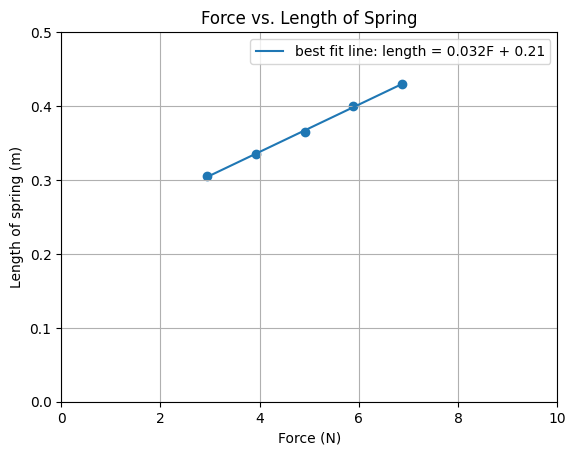

In [ ]:
plt.scatter(data['Fg'],data['L0']) # This makes a scatterplot of Fg on the x-axis and L0 on the y, but we need to make labels.
# the following set up labels (with units) for the x and y axes plus a title
plt.xlabel('Force (N)')
plt.ylabel('Length of spring (m)')
plt.title('Force vs. Length of Spring')
# Now let's set up ranges on each axis:
plt.axis([0, 10, 0, 0.5])
plt.grid(True)

# Now plot a line of best fit using polyfit where "1" means a line, "2" would be a quadratic, etc.

a, b = np.polyfit(data['Fg'],data['L0'], 1)  # a is the slope and b is the y intercept, in this case, the length of the spring with no mass
a = round(a,3)
b = round(b,3)
plt.plot(data['Fg'], a*data['Fg']+b, label='best fit line: length = '+str(a)+'F + '+str(b) )
plt.legend()
print(a,b)
k = round(1/a,2)  # 1/slope is the spring constant, rounded to 2 decimal places
# You should justify your own uncertainty depending on your lab process!
# We can also enter the equation of the line in a legend, and move it around, as needed

print("k =",k)

Now it's time to analyze the mass vs. period data.
We'll need to take an average, find repeated trial uncertainty, and graph the data.
In this case, we'll need to linearize the data, then regraph with appropriate error bars.
Finally, we need to find the maximum and minimum slopes of lines that fit through the error bars and, at least in your lab write-up, explain the meaning of the result.
With the average period calculated, it's time to justify measurement uncertainty. In this case, the mass uncertainty is very small, under 1%, so we'll ignore it here. T_mu will stand for the period's measurement uncertainty.

In [ ]:
T_mu = 0.02

In [ ]:
data['Tavg'] = np.round((data['t1']+data['t2']+data['t3']+data['t4']+data['t5']+data['t6'])/60,2)
# made a new column of the averages and divided by 10 to get the average period
# rounded to 2 decimal places

data.head(3)

,m,L0,t1,t2,t3,t4,t5,t6,Fg,Tavg
0,0.3,0.305,6.46,6.33,5.51,5.49,5.50,5.53,2.943,0.58
1,0.4,0.335,7.15,6.47,7.23,7.23,7.29,7.17,3.924,0.71
2,0.5,0.365,7.99,7.93,8.00,7.95,8.10,7.96,4.905,0.80


In [ ]:
# Now to find the repeated trial uncertainty. I don't like to assume a normal distribution, so (max-min)/2 will use half the range for uncertainty.

data['T_unc'] = [(max(data.iloc[i, 2:8])- min(data.iloc[i, 2:8]))/20 for i in range(len(data))]

# iloc is locating the columns 2-8 and finding the max and min where 2-8 doesn't include the final row, but has each of the trials
#dividing by 20 to take half of the range and 1/10th for the ten periods measured
# i in range means that it runs through the data set for each level of IV

data.head(3)

,m,L0,t1,t2,t3,t4,t5,t6,Fg,Tavg,T_unc
0,0.3,0.305,6.46,6.33,5.51,5.49,5.50,5.53,2.943,0.58,0.0485
1,0.4,0.335,7.15,6.47,7.23,7.23,7.29,7.17,3.924,0.71,0.0410
2,0.5,0.365,7.99,7.93,8.00,7.95,8.10,7.96,4.905,0.80,0.0085


You still need to justify your choice of uncertainty. What measurement uncertainty do you have? Is it larger or smaller than the repeated trial uncertainty?


In [ ]:
data.loc[data['T_unc'] < T_mu, 'T_unc'] = T_mu



In [ ]:
data.head(6)

,m,L0,t1,t2,t3,t4,t5,t6,Fg,Tavg,T_unc
0,0.3,0.305,6.46,6.33,5.51,5.49,5.50,5.53,2.943,0.58,0.0485
1,0.4,0.335,7.15,6.47,7.23,7.23,7.29,7.17,3.924,0.71,0.0410
2,0.5,0.365,7.99,7.93,8.00,7.95,8.10,7.96,4.905,0.80,0.0200
3,0.6,0.400,8.71,8.71,8.69,8.84,8.73,8.71,5.886,0.87,0.0200
4,0.7,0.430,9.41,9.35,9.60,9.50,9.50,9.43,6.867,0.95,0.0200


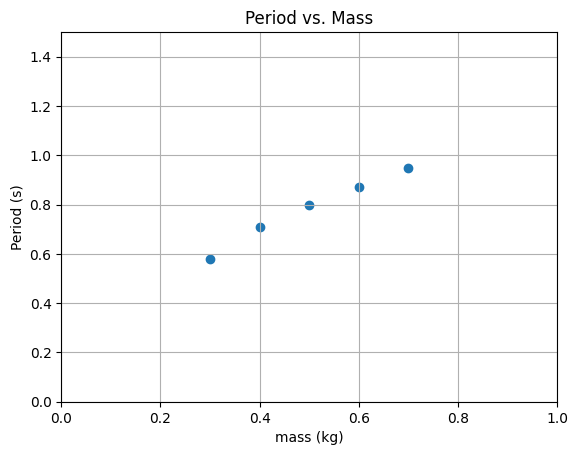

In [ ]:
plt.scatter(data['m'],data['Tavg']) # hanging mass on x, average period on y axes
# the following set up labels (with units) for the x and y axes plus a title
plt.xlabel('mass (kg)')
plt.ylabel('Period (s)')
plt.title('Period vs. Mass')
# Now let's set up ranges on each axis:
plt.axis([0, 1, 0, 1.5])
plt.grid(True)


In [ ]:
#Now we need to linearize: square the y values
data['T_squ']= data['Tavg']*data['Tavg']
data.head(3)

,m,L0,t1,t2,t3,t4,t5,t6,Fg,Tavg,T_unc,T_squ
0,0.3,0.305,6.46,6.33,5.51,5.49,5.50,5.53,2.943,0.58,0.0485,0.3364
1,0.4,0.335,7.15,6.47,7.23,7.23,7.29,7.17,3.924,0.71,0.0410,0.5041
2,0.5,0.365,7.99,7.93,8.00,7.95,8.10,7.96,4.905,0.80,0.0200,0.6400


1.385 -0.065


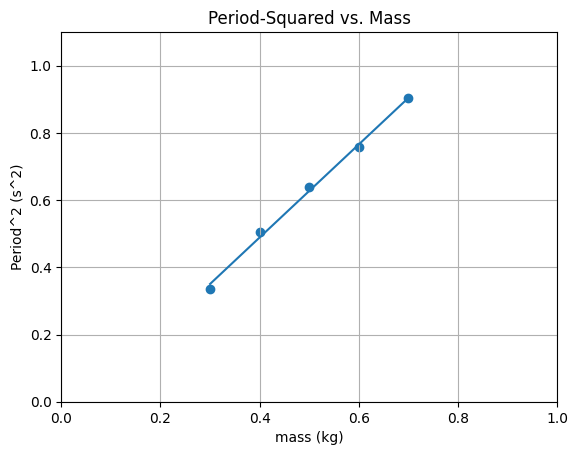

In [ ]:
plt.scatter(data['m'],data['T_squ']) # hanging mass on x, average period squared on y axes
# the following set up labels (with units) for the x and y axes plus a title
plt.xlabel('mass (kg)')
plt.ylabel('Period^2 (s^2)')
plt.title('Period-Squared vs. Mass')
# Now let's set up ranges on each axis:
plt.axis([0, 1, 0, 1.1])
plt.grid(True)

# And the line of best fit
a, b = np.polyfit(data['m'],data['T_squ'], 1)  # a is the slope and b is the y intercept,
a = round(a,3)
b = round(b,3)
plt.plot(data['m'], a*data['m']+b)
print(a,b)

In [ ]:
#Need to add error bars--first follow through with uncertainty, called T_su for T^2 uncertainty, double the relative uncertainty
data['T_su'] = 2*data['T_squ']*data['T_unc']/data['Tavg']
data.head(3)
#data.shape

,m,L0,t1,t2,t3,t4,t5,t6,Fg,Tavg,T_unc,T_squ,T_su
0,0.3,0.305,6.46,6.33,5.51,5.49,5.50,5.53,2.943,0.58,0.0485,0.3364,0.05626
1,0.4,0.335,7.15,6.47,7.23,7.23,7.29,7.17,3.924,0.71,0.0410,0.5041,0.05822
2,0.5,0.365,7.99,7.93,8.00,7.95,8.10,7.96,4.905,0.80,0.0200,0.6400,0.03200


Now ready to make error bars!
First we graph everything as before, but now also graph the uncertainty in T^2. If you had to, you could add x error bars as well.
We will have to graph everything all together.

1.385 -0.065


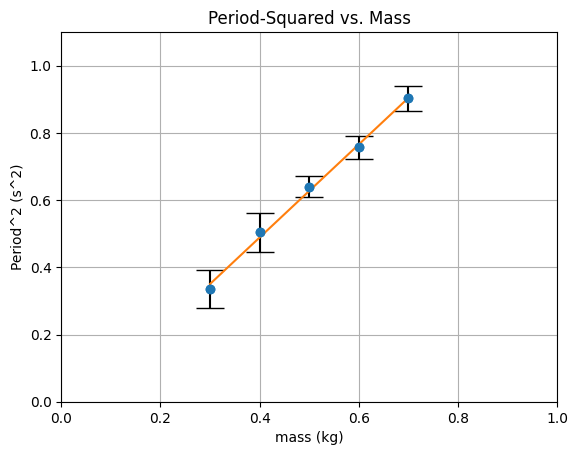

In [ ]:
plt.scatter(data['m'],data['T_squ']) # hanging mass on x, average period squared on y axes
# the following set up labels (with units) for the x and y axes plus a title
#ax.errorbar(x_values, y_values, yerr=errorbars, ecolor='black', capsize=10, fmt='o')
plt.errorbar(data['m'],data['T_squ'],yerr=data['T_su'], ecolor='black', capsize=10, fmt='o') # Adding errorbars, only in y-direction
plt.xlabel('mass (kg)')
plt.ylabel('Period^2 (s^2)')
plt.title('Period-Squared vs. Mass')
# Now let's set up ranges on each axis:
plt.axis([0, 1, 0, 1.1])
plt.grid(True)


# And the line of best fit
a, b = np.polyfit(data['m'],data['T_squ'], 1)  # a is the slope and b is the y intercept,
a = round(a,3)
b = round(b,3)
plt.plot(data['m'], a*data['m']+b)
print(a,b)




Now we need to find the maximum and minimum slopes that fit through the error bars.
Let's calculate what those might be in the simplest case where we go from the bottom right to top left for the max slope, and opposite for the min slope.

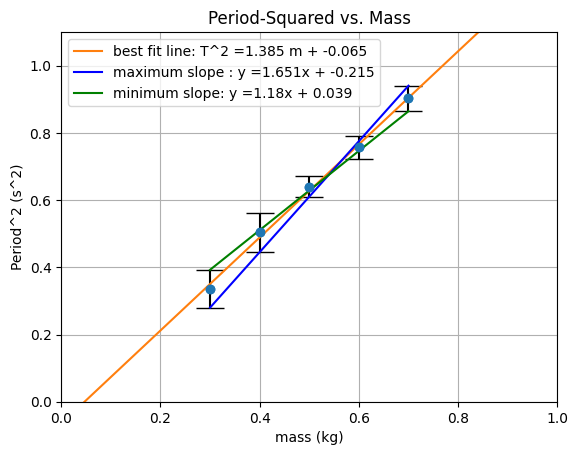

In [ ]:
plt.scatter(data['m'],data['T_squ']) # hanging mass on x, average period squared on y axes
# the following set up labels (with units) for the x and y axes plus a title
#ax.errorbar(x_values, y_values, yerr=errorbars, ecolor='black', capsize=10, fmt='o')
plt.errorbar(data['m'],data['T_squ'],yerr=data['T_su'], ecolor='black', capsize=10, fmt='o') # Adding errorbars, only in y-direction
plt.xlabel('mass (kg)')
plt.ylabel('Period^2 (s^2)')
plt.title('Period-Squared vs. Mass')
# Now let's set up ranges on each axis:
plt.axis([0, 1, 0, 1.1])
plt.grid(True)


# And the line of best fit
a, b = np.polyfit(data['m'],data['T_squ'], 1)  # a is the slope and b is the y intercept,
a = round(a,3)
b = round(b,3)
xaxis = np.arange(0,2)    #sets up to plot best fit line from 0 through 1
plt.plot(xaxis, a*xaxis+b, label='best fit line: T^2 ='+str(a)+' m + '+str(b))  # Concatonating strings to write equation
#print(a,b)    If you want slope and intercept printed, turn this back to code

x1 = data['m'][0]                       # The x value for both max and min is the same here--maybe not for you later!
ymax1 = data['T_squ'][0]-data['T_su'][0]
ymin1 = data['T_squ'][0]+data['T_su'][0]

x2 = data['m'][4]
ymax2 = data['T_squ'][4]+data['T_su'][4]
ymin2 = data['T_squ'][4]-data['T_su'][4]

# Need to find equations of max/min slopes--chose to "brute force" using polyfit again, since I can just copy the code
amax, bmax = np.polyfit([x1,x2],[ymax1,ymax2], 1)  # maximum slope and intercept
amax = round(amax,3)
bmax = round(bmax,3)

amin, bmin = np.polyfit([x1,x2],[ymin1,ymin2], 1)  # minimum slope and intercept
amin = round(amin,3)
bmin = round(bmin,3)

plt.plot([x1,x2],[ymax1,ymax2],'blue', label='maximum slope : y ='+str(amax)+'x + '+str(bmax))
plt.plot([x1,x2],[ymin1,ymin2],'green', label='minimum slope: y ='+str(amin)+'x + '+str(bmin))
plt.legend()

If your maximum or minimum lines don't go through all the error bars, you will have to adjust the code, using different data points.

You clearly don't need to put all of these graphs in your lab write-up.

In [ ]:
# While there may be ways to make nice tables using either Styler or Tabulate
# For now, just print out your data and copy to a spreadsheet or document for fixing up.
print(data)

     m     L0    t1    t2    t3    t4    t5    t6     Fg  Tavg   T_unc  \
0  0.3  0.305  6.46  6.33  5.51  5.49  5.50  5.53  2.943  0.58  0.0485   
1  0.4  0.335  7.15  6.47  7.23  7.23  7.29  7.17  3.924  0.71  0.0410   
2  0.5  0.365  7.99  7.93  8.00  7.95  8.10  7.96  4.905  0.80  0.0200   
3  0.6  0.400  8.71  8.71  8.69  8.84  8.73  8.71  5.886  0.87  0.0200   
4  0.7  0.430  9.41  9.35  9.60  9.50  9.50  9.43  6.867  0.95  0.0200   

    T_squ     T_su  
0  0.3364  0.05626  
1  0.5041  0.05822  
2  0.6400  0.03200  
3  0.7569  0.03480  
4  0.9025  0.03800  
